# Preparing Data

In [1]:
import math
import random
from random import seed
from random import randrange

import numpy
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df1 = pd.read_csv('Data.csv', sep=',')

## Take 600 elements to force speed of algorithms

In [58]:
df1 = df1[:600]

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              600 non-null    int64 
 1   Workclass        600 non-null    object
 2   Fnlwgt           600 non-null    int64 
 3   Education        600 non-null    object
 4   Education-num    600 non-null    int64 
 5   Marital-status   600 non-null    object
 6   Occupation       600 non-null    object
 7   Relationship     600 non-null    object
 8   Race             600 non-null    object
 9   Sex              600 non-null    object
 10  Capital-gain     600 non-null    int64 
 11  Capital-loss     600 non-null    int64 
 12  Hours-per-week   600 non-null    int64 
 13  Native-Country   600 non-null    object
 14  Income-per-year  600 non-null    object
dtypes: int64(6), object(9)
memory usage: 70.4+ KB


In [60]:
df1.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000
mean,38.016667,1.926703e+05,10.073333,562.980000,101.825000,39.801667
std,13.505816,1.124690e+05,2.586976,2658.704404,427.045514,11.740474
min,17.000000,2.117400e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.144500e+05,9.000000,0.000000,0.000000,40.000000
50%,36.000000,1.839230e+05,10.000000,0.000000,0.000000,40.000000
75%,46.000000,2.455462e+05,12.000000,0.000000,0.000000,42.250000
max,90.000000,1.033222e+06,16.000000,34095.000000,2415.000000,98.000000


## Removing unneeded columns (fnlwgt & education)

### 'Education_num' already represents 'Education' but in numeric

In [61]:
df1 = df1.drop(columns=['Fnlwgt', 'Education', 'Race', 'Native-Country'])

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              600 non-null    int64 
 1   Workclass        600 non-null    object
 2   Education-num    600 non-null    int64 
 3   Marital-status   600 non-null    object
 4   Occupation       600 non-null    object
 5   Relationship     600 non-null    object
 6   Sex              600 non-null    object
 7   Capital-gain     600 non-null    int64 
 8   Capital-loss     600 non-null    int64 
 9   Hours-per-week   600 non-null    int64 
 10  Income-per-year  600 non-null    object
dtypes: int64(5), object(6)
memory usage: 51.7+ KB


## Change type Object to Category

In [63]:
df1['Workclass'].value_counts()

 Private             415
 Self-emp-not-inc     45
 Local-gov            42
 ?                    41
 State-gov            21
 Federal-gov          18
 Self-emp-inc         18
Name: Workclass, dtype: int64

In [64]:
df1['Workclass'] = df1['Workclass'].astype('category').cat.codes

In [65]:
df1['Education-num'].value_counts()

9     186
10    141
13     95
14     33
7      29
12     27
11     26
6      11
4      10
5       9
16      8
15      7
3       7
2       6
8       4
1       1
Name: Education-num, dtype: int64

In [66]:
df1['Marital-status'].value_counts()
df1['Marital-status'] = df1['Marital-status'].astype('string')

## Change all marital statuses to Married/Not-married

In [67]:
Marital_status = df1['Marital-status']

Marital_status.replace({' Married-civ-spouse':'Married',' Married-AF-spouse':'Married'}, inplace=True)
Marital_status.replace({' Never-married':'Not-married',' Divorced':'Not-married',
                        ' Separated':'Not-married', ' Widowed':'Not-married',
                        ' Married-spouse-absent':'Not-married'}, inplace=True)
Marital_status.value_counts()

Not-married    327
Married        273
Name: Marital-status, dtype: int64

In [68]:
df1['Marital-status'] = df1['Marital-status'].astype('category').cat.codes
df1['Marital-status'].value_counts()

1    327
0    273
Name: Marital-status, dtype: int64

In [69]:
df1['Occupation'].value_counts()

 Craft-repair         78
 Prof-specialty       74
 Sales                68
 Exec-managerial      68
 Other-service        65
 Adm-clerical         56
 ?                    41
 Machine-op-inspct    35
 Transport-moving     32
 Handlers-cleaners    28
 Tech-support         26
 Farming-fishing      14
 Protective-serv      13
 Armed-Forces          1
 Priv-house-serv       1
Name: Occupation, dtype: int64

In [70]:
df1['Occupation'] = df1['Occupation'].astype('category').cat.codes

## Change Relationship to have a child/not have a child

In [71]:
df1['Relationship'].value_counts()

 Husband           226
 Not-in-family     170
 Own-child          83
 Unmarried          64
 Wife               42
 Other-relative     15
Name: Relationship, dtype: int64

In [72]:
df1['Relationship'].replace({' Husband':'No-child',' Not-in-family':'No-child',
                        ' Unmarried':'No-child', ' Wife':'No-child',
                        ' Other-relative':'No-child'}, inplace=True)

In [73]:
df1['Relationship'] = df1['Relationship'].astype('category').cat.codes

## Sex and Income-per-year to a category

In [75]:
df1['Sex'].value_counts()

 Male      399
 Female    201
Name: Sex, dtype: int64

In [76]:
df1['Sex'] = df1['Sex'].astype('category').cat.codes

In [77]:
df1['Income-per-year'].value_counts()

 <=50K    466
 >50K     134
Name: Income-per-year, dtype: int64

In [78]:
df1['Income-per-year'] = df1['Income-per-year'].astype('category').cat.codes

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              600 non-null    int64
 1   Workclass        600 non-null    int8 
 2   Education-num    600 non-null    int64
 3   Marital-status   600 non-null    int8 
 4   Occupation       600 non-null    int8 
 5   Relationship     600 non-null    int8 
 6   Sex              600 non-null    int8 
 7   Capital-gain     600 non-null    int64
 8   Capital-loss     600 non-null    int64
 9   Hours-per-week   600 non-null    int64
 10  Income-per-year  600 non-null    int8 
dtypes: int64(5), int8(6)
memory usage: 27.1 KB


In [80]:
len(df1)

600

## Function for splitting a Dataframe

In [81]:
def train_test_split(df, test_size=0.2):
    """Spits dataframe to 2 parts
    
    Keyword input arguments:
    df -- Dataframe which will be splitted
    test_size -- Proportion of the second part to the whole Dataframe
    
    Output:
    df_Train -- a first created part (for training sample)
    df_Test -- a second created part (for testing sample)
    
    """ 
    # Get a random sample of df, resetting it indexes
    df = df.sample(frac=1).reset_index(drop=True)
    df = pd.DataFrame(df)
    size = len(df)
    # First (size * test_size rows) is a training sample
    # Other rows move to a testing sample
    df_Test = df.iloc[:int(size * test_size),:]
    df_Train = df.iloc[int(size * test_size):,:]
    return df_Train, df_Test

## Making training and testing samples

In [94]:
df_train, df_test = train_test_split(df1, 0.2)

df_test_Y = df_test['Income-per-year']
df_test_X = df_test.drop(columns=['Income-per-year'])

df_train_Y = df_train['Income-per-year']
df_train_X = df_train.drop(columns=['Income-per-year'])

## Entropy Criteria
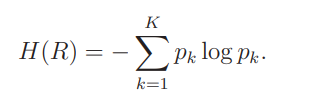
### Calculates the Entropy index for a split dataset

In [82]:
def entropy_index(groups, value_types):
    """Calculates entropy index for the groups
    
    Keyword input arguments:
    groups -- splitted groups, for which Entropy index is calculated, of type (X1,X2,..,XN, Y)
    value_types -- All possible classes of results (as a set) - for classificaton -> {0, 1}
    
    Output:
    entropy -- a weighted entropy criteria based on sizes of groups
    
    """ 
    # count all given samples
    count_samples = sum([len(group) for group in groups])
    # sum weighted Entropy for each group
    entropy = 0.0
    for group in groups:
        size = float(len(group))
        # if values in group do not exist -> next iteration
        if size == 0:
            continue
        # score - a score of the current group
        score = 0.0
        # score the group based on the score for each class
        for val in value_types:
            # count_val is the count of current class for current group
            count_val = 0.0
            for row in group:
                # row[-1] is Y[row]
                if row[-1] == val:
                    count_val += 1
            # ratio_val is proportion of current class in the whole group
            ratio_val = count_val/size
            # if a class does not exist in a group - score doesn't change
            if count_val == 0:
                score -= 0
            # update score of the group according to Entropy formula
            else:
                score -= ratio_val * math.log2(ratio_val)
        # Getting weighted Entropy Index depending on size of group
        entropy += score * (size / float(count_samples))
    return entropy

## Splits for a decision tree based on Entropy Criteria
### Split a sample based on an attribute value

In [83]:
def make_split(column, value, training_list):
    """Splits a sample based on value of column
    
    Keyword input arguments:
    column -- attribute, on value of which split is made
    value -- a value of column, with which every row[column] is compared
    training_list -- a sample (dataset) which is splitted
    
    Output:
    left_child -- first group of split, where row[column] < value
    right_child -- second group of split, where row[column] > value
    
    """ 
    left_child = list()
    right_child = list()
    # go through all rows and compare their values with 'value'
    for row in training_list:
        if row[column] < value:
            left_child.append(row)
        else:
            right_child.append(row)
    return left_child, right_child

### Get the best split point based on entropy criteria

In [157]:
def take_best_split(training_list, count_features):
    """Finds the best possible split based on entropy
    
    Keyword input arguments:
    training_list -- a dataset of type (X1,X2,..,XN, Y)
    count_features -- a count of all columns which can be used for splitting
    
    Output:
    Dictionary:
        column -- best column used for splitting (used for printing a Tree, and predicting)
        val -- best value of column for splitting (used for printing a Tree, and predicting)
        groups -- left and right childs
    
    """ 
    # value_types is a set of all possible classes of Y -- for classification {0, 1}
    value_types = list(set(result[-1] for result in training_list))
    
    # columns -- chosen columns for splitting
    columns = list()
    # take random (count_features) columns from all possible columns (except Y)
    while (len(columns) < count_features):
        ind = random.randint(0, len(training_list[0]) - 2)
        # add random index of column to 'columns' if it is not already added
        if ind not in columns:
            columns.append(ind)
    
    # best_column - best column for splitting
    best_column = -1
    # best_value - best value of column, which should 
    # be used for splitting a dataset into left and right ones
    best_value = -1
    # best_score - best entropy parameter
    best_score = 10000000
    # best_groups - left and right parts of tree
    best_groups = None
    
    # go through all columns and rows and get the best entropy value and, thus, best split
    for column in columns: #for all columns except value-attribute
        # go through every row and take 'value' as row[column]
        for row in training_list:
            # make groups and calculate weighted entropy for them
            groups = make_split(column, row[column], training_list)
            entropy = entropy_index(groups, value_types)
            # if entropy is better update best parameters
            if entropy < best_score:
                best_column = column
                best_value = row[column]
                best_score = entropy
                best_groups = groups
                
    return {'column':best_column, 'val':best_value, 'groups':best_groups}

### Creating Random Sample

In [86]:
def get_random_sample(training_list, rows_count=0):
    """Get a random sample of N rows from training_list with repetition
    A new sample can even have more rows than training_list has
    
    Keyword input arguments:
    training_list -- a dataset of type (X1,X2,..,XN, Y)
    rows_count -- a count of rows which will represent a size of a random sample
    
    Output:
    new_list -- a new random sample of (rows_count) rows
    
    """
    # function allows dublicate rows
    new_list = list()
    # If count of rows is zero return back input list
    if rows_count == 0:
        return training_list
    while (len(new_list)<rows_count):
        ind = random.randint(0, len(training_list) - 1)
        new_list.append(training_list[ind])
    return new_list

## Creating a Decision tree based on ordinary nodes and terminal nodes (leaves)
### A leaf should be created in such cases:
### 1) If one of the groups is empty
### 2) If current depth is greater than Max(depth)
### 3) If size of a leaf (count of entries) is less than Min(size)

## Making a leaf

In [108]:
def make_leaf(group):
    """Making a leaf (terminal node)
    
    Keyword input arguments:
    group -- a dataset of type (X1,X2,..,XN, Y), represent all rows in a current group
    
    Output:
    chosen_option -- the most widely-spread value
    
    """
    classes = list()
    # take all gotten values in Y
    for row in group:
        classes.append(row[-1])
    # sort all values descending by their count in classes
    values = sorted(set(classes), key = classes.count, reverse=True)
    # Choose the most possible class (option/result)
    chosen_option = values[0]
    
    return chosen_option

## Splitting current node on left and right ones

In [163]:
def split_node(node, max_depth, min_leaf_size, depth, count_features):
    """Making splits until reaches max_depth or min_leaf_size of a leaf
    
    Keyword input arguments:
    node -- a current node of the tree
    max_depth -- a hyperparameter for a tree, shows maximum possible depth of the tree
    min_size -- a hyperparameter for a tree, shows minimal size of a leaf (min count of rows in a leaf)
    depth -- a current depth to monitor reaching max_depth
    count_features -- a hyperparameter for a tree, shows count of features used for splitting a node
    
    Output:
    -/-
    
    """
    l_child, r_child = node['groups']
    del(node['groups'])
    # if one group is empty, make a leaf
    # and if size of a group is less than min_size then also make a leaf
    if (len(l_child)<min_leaf_size) or (len(r_child)<min_leaf_size):  
        # can be replaced by 'not l_child or not r_child'
        # to restrict a size of node - not a leaf
        node['left'] = node['right'] = make_leaf(l_child + r_child)
        return
    
    # if current depth is greater than max_depth, then make terminal nodes
    if depth >= max_depth:
        node['left'] = make_leaf(l_child)
        node['right'] = make_leaf(r_child)
        return
    
    # execute left group
    # if size of left child equals to min_size, then make a leaf
    if len(l_child) == min_leaf_size:
        node['left'] = make_leaf(l_child)
    # if size of left child greater than min_size, then make an ordinary node for next split
    else:
        node['left'] = take_best_split(l_child, count_features)
        split_node(node['left'], max_depth, min_leaf_size, depth+1, count_features)
    
    # execute right group
    # if size of right child less than min_size, then make terminal node
    if len(r_child) == min_leaf_size:
        node['right'] = make_leaf(r_child)
    # if size of right child greater than min_size, then make an ordinary node for next split
    else:
        node['right'] = take_best_split(r_child, count_features)
        split_node(node['right'], max_depth, min_leaf_size, depth+1, count_features)

## Training a decision tree

In [167]:
def trainTREE(train_X, train_Y, max_depth=5, min_size=20, count_features=0, count_rows_in_sample=0):
    """Builds a decision tree, based on params
    
    Keyword input arguments:
    max_depth -- Maximum depth of the tree
    min_size -- Minimum size in a leaf to continue splitting nodes
    trainX -- training sample which contains only features (X)
    trainY -- training sample which contains obly results (Y)
    count_features -- count of columns which can be used to split a node
    
    Output:
    root -- a created decision tree
    
    """   
    # change type of training_list and training_results to list()
    training_list = train_X.values.tolist()
    training_results = train_Y.values.tolist()
    # if count_features isn't given -> take all features
    if (count_features == 0):
        count_features = len(training_list[0])
    # unite training_list and training_results
    for i in range(len(training_results)):
        training_list[i].append(training_results[i])
    # Get a random sample
    # if count_rows_in_sample is 0 than returned sample is training_list
    training_list = get_random_sample(training_list, count_rows_in_sample)
    # make first node
    root = take_best_split(training_list,count_features)
    # splitting a node until reaches 'stop-parameters'
    split_node(root, max_depth, min_size, 1, count_features)
    return root

## Printing a decision tree for illustration of work

In [172]:
def print_tree(node, depth=0):
    """Prints the given tree
    
    Keyword input arguments:
    node -- a current node of tree
    depth -- a current depth of a tree
    
    Output:
    -/-
    
    """ 
    # if node is a dict, it has child nodes
    if isinstance(node, dict):
        print('%s[X%d < %d]' % ((depth*' ', (node['column']), node['val'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    # otherwise, it is a single node - a leaf
    else:
        print('%s[%s]' % ((depth*' ', node)))

### Training and printing the tree

In [165]:
tree = trainTREE(df_train_X, df_train_Y, 5, 10)

In [173]:
print_tree(tree)

[X3 < 1]
 [X7 < 5178]
  [X2 < 10]
   [X9 < 40]
    [X4 < 8]
     [0]
     [0]
    [X0 < 31]
     [0]
     [0]
   [X0 < 28]
    [X9 < 55]
     [0]
     [0]
    [X8 < 1887]
     [1]
     [1]
  [X7 < 7298]
   [1]
   [1]
 [X0 < 31]
  [X3 < 1]
   [0]
   [0]
  [X9 < 45]
   [X7 < 14344]
    [0]
    [0]
   [X1 < 2]
    [0]
    [0]


## Making predictions based on created TREE model
### For each row in dataset func 'PredictTREE' predicts the result by going through created tree

In [99]:
def predictTREE(root, test):
    """Predicts results for given tree
    
    Keyword input arguments:
    root -- a trained model -> a root of the tree
    test -- list of (X1,X2,..,XN) for which it makes prediction
    
    Output:
    result_list -- a list of (Y) -> results of prediction
    
    """
    # Make a list of lists from 'test'
    testing_list = test.values.tolist()
    result_list = []
    # Predict value for each row
    for row in testing_list:
        result_list.append(predictTREE_Row(node, row))
    return result_list

In [174]:
def predictTREE_Row(node, row):
    """Predicts recursively results for a row
    
    Keyword input arguments:
    node -- a current node the tree
    row -- a row (X1,X2,..,XN) for which it makes prediction
    
    Output:
    returns result Y
    
    """
    # go recursively through the tree until function reaches a terminal node (a leaf) - it will be a result
    # Choosing the path, where to go: left or right, depending on value
    if row[node['column']] < node['val']:
        # check that node['left'] is not a leaf -> then go deeper
        if isinstance(node['left'], dict):
            return predictTREE_Row(node['left'], row)
        # if node['left'] is a leaf -> return its value
        else:
            return node['left']
    else:
        # check that node['right'] is not a leaf -> then go deeper
        if isinstance(node['right'], dict):
            return predictTREE_Row(node['right'], row)
        # if node['right'] is a leaf -> return its value
        else:
            return node['right']

In [154]:
results = predictTREE(tree, df_test_X)

## Function for getting the percentage of correct answers to evaluate created model

In [134]:
# get percentage of correct answers
def checkScore(list1, list2):
    correct = 0.0
    for i in range(len(list1)):
        if list1[i] == list2[i]:
            correct+=1
    return correct/len(list1)

In [182]:
checkScore(results, list(df_test_Y))

0.85

## Function for getting AUC, True-Positive-Rate, False-Positive-Rate
1. вычислить количество представителей классов +1 и -1 в выборке;
2. упорядочить выборку X^m по убыванию значений f(x_i,w);
3. установить начальную точку ROC-кривой;
4. для всех  i:=1..m 
     если (y_i = -1), то сместиться на один шаг вправо;
5.   иначе сместиться на один шаг вверх;

In [176]:
def getMetrics(y_test, y_predicted):
    """Gets AUC, True Positive Rate and False Positive Rate
    
    Keyword input arguments:
    y_test -- List of testing results
    y_predicted -- List of predicted results
    
    Output:
    tpr -- True Positive Rate
    fpr -- False Positive Rate
    auc -- AUC, which means Area Under ROC-Curve
    
    """    
    # total_count -- count of all entries (rows)
    total_count = len(y_test)
    # test_neg_count -- count of '0' results in testing sample
    # test_pos_count -- count of '1' results in testing sample
    test_neg_count, test_pos_count = 0, 0
    # Getting positive and negative counts
    for val in y_test:
        if val == 1:
            test_pos_count += 1
        else:
            test_neg_count += 1
    fpr=[]
    tpr=[]
    auc = 0
    # making first point (0,0)
    fpr.append(0)
    tpr.append(0)
    # y_list -- sorted 'y_test' by descending results of y_predicted
    y_list=[]   
    for i in range(total_count):
        if y_predicted[i] == 0:
            y_list.append(y_test[i])
        else:
            y_list.insert(0, y_test[i])
    # Making points ROC-curve depending on y_list result
    # Calculating AUC
    for i in range(total_count):
        # Step to the right
        if y_list[i] == 0:
            fpr.append(fpr[i]+1/test_neg_count)
            tpr.append(tpr[i])
            auc = auc + tpr[i+1]/test_neg_count
        # Step up
        else:
            fpr.append(fpr[i])
            tpr.append(tpr[i]+1/test_pos_count)
    return tpr, fpr, auc

### Построение ROC-кривой и подсчет AUC с помощью описанной выше функции

In [177]:
tpr, fpr, auc = getMetrics(list(df_test_Y), results)

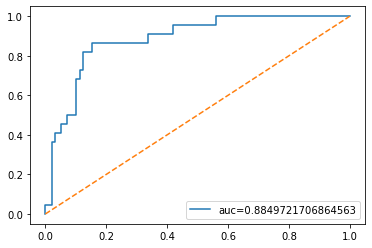

In [178]:
plt.plot(fpr, tpr, label='auc='+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()

### Checking the results with sklearn

In [179]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(list(df_test_Y), results)

In [180]:
print(auc)

0.8024118738404452


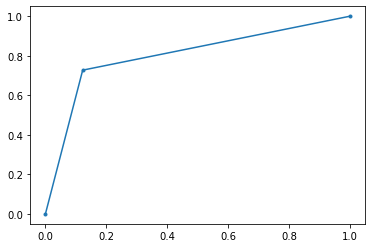

In [181]:
fpr, tpr, thresholds = roc_curve(list(df_test_Y), results)
plt.plot(fpr, tpr, marker='.')
plt.show()

## Making RND training and prediction

In [183]:
def trainRND(train_X, trainY):
    """Gets proportion of positive and negative results
    
    Keyword input arguments:
    train_X -- training dataframe (X1, X2, .., XN)
    trainY -- results for training dataframe (Y)
    
    Output:
    float(negatives)/total_count -- proportion of negative results in a sample
    float(positives)/total_count -- proportion of positive results in a sample
    
    """ 
    training_list = trainY.values.tolist()
    total_count = len(training_list)
    negatives = 0
    positives = 0
    for val in training_list:
        if val != 1:
            negatives += 1
        else:
            positives += 1
    return float(negatives)/total_count, float(positives)/total_count

In [184]:
def predictRND(chances, variants, X):
    """Randomly generates results based on proportion of results
    
    Keyword input arguments:
    chances -- proportion of results (type: list)
    variants -- all posible variations of results
    X -- training dataframe (X1, X2, .., XN)
    
    Output:
    float(negatives)/total_count -- proportion of negative results in a sample
    float(positives)/total_count -- proportion of positive results in a sample
    
    """
    result = list()
    X = X.values.tolist()
    for row in X:
        result.append(numpy.random.choice(variants, p=[chances[0], chances[1]]))
    return result

## Checking work of RND

In [185]:
modelRND = trainRND(df_train_X, df_train_Y)

In [186]:
RND_results = predictRND(modelRND, [0, 1] , df_test_X)

In [187]:
tpr, fpr, auc = getMetrics(list(df_test_Y), RND_results)

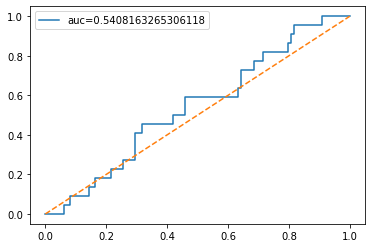

In [188]:
plt.plot(fpr, tpr, label='auc='+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()

# Model 2

## Functions for training and predicting Random Forest

In [189]:
def trainRANDOM_FOREST(train_X, train_Y, max_depth=5, min_size=20, count_features=0, 
                   count_trees=1, count_rows_in_sample=0):
    """Builds random forest and trains a model
    
    Keyword input arguments:
    max_depth -- Maximum depth of the tree
    min_size -- Minimum size in a leaf to continue splitting nodes
    trainX -- training sample which contains only features (X)
    trainY -- training sample which contains obly results (Y)
    count_features -- count of columns which can be used to split a node
    count_trees -- count of total trees created by function
    count_rows_in_sample -- count rows used to train one tree
    
    Output:
    forest -- a list of trees, generated by the fuction, represents a model
    
    """    
    forest = list()
    for i in range(count_trees):
        forest.append(trainTREE(train_X, train_Y, max_depth, 
                                 min_size, count_features, count_rows_in_sample))
    return forest

In [190]:
def predictRANDOM_FOREST(forest, test_X):
    """Predicts results on list of rows
    
    Keyword input arguments:
    forest -- a model, represents list of trees (got by random forest)
    test_X -- testing sample which contains only features (X)
    
    Output:
    final_results -- a list of calculated results
    
    """  
    # Get answer from every tree
    recieved_answers = list()
    for tree in forest:
        recieved_answers.append(predictTREE(tree, test_X))
    # Determine a 'most popular' result for every row
    final_results = list()
    for i in range(len(test_X)):
        answer = list()
        for row in recieved_answers:
            answer.append(row[i])
        final_results.append(max(set(answer), key=answer.count))
    return final_results

## Checking results of Random Forest

In [191]:
forest = trainRANDOM_FOREST(df_train_X, df_train_Y, 10, 10, 6, 15, 480)

In [192]:
forest_results = predictRANDOM_FOREST(forest, df_test_X)

In [193]:
tpr, fpr, auc = getMetrics(list(df_test_Y), forest_results)

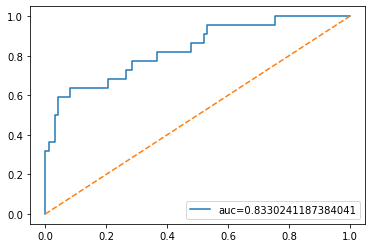

In [194]:
plt.plot(fpr, tpr, label='auc='+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()

In [195]:
checkScore(forest_results, list(df_test_Y))

0.8833333333333333

# Model 3 - GBM

In [196]:
from sklearn.tree import DecisionTreeRegressor

### Change Y from {0, 1} to {-1, 1}

In [200]:
df1_train, df1_test = train_test_split(df1, 0.2)

df1_test_Y = df1_test['Income-per-year']
df1_test_X = df1_test.drop(columns=['Income-per-year'])

df1_train_Y = df1_train['Income-per-year']
df1_train_X = df1_train.drop(columns=['Income-per-year'])

df1_train_Y = df1_train_Y.replace(to_replace=0, value=-1)
df1_test_Y = df1_test_Y.replace(to_replace=0, value=-1)

df1_train_Y=df1_train_Y.to_frame()
df1_test_Y=df1_test_Y.to_frame()

## Training and testing boosting

In [210]:
def trainGBM(X, Y, M):
    """Makes gradient boosting for regression trees
    
    Keyword input arguments:
    X -- training sample which contains only features (X)
    Y -- training sample which contains obly results (Y) -> {-1, +1}
    M -- count of iterations
    
    Output:
    trees -- a model, generated by gradient boosting, consists of trees
    """
    # Starting values are random {-1, 1}
    # f_x is a list of current values
    f_x = predictRND((0.5, 0.5),[-1, 1], X)
    trees = list()
    # make Y as a list
    Y = Y[Y.columns[0]].values.tolist()
    # make M iterations for GBM
    for i in range(M):
        # gradient - a list for gradients for all rows
        gradient = list()
        for j in range(len(f_x)):
            # logistic loss already includes a negative sign
            logistic_loss = 2 * Y[j] * math.exp(-2 * f_x[j] * Y[j]) / (1 + math.exp(-2 * f_x[j] * Y[j]))
            gradient.append(logistic_loss)
        # fit model to gradient
        tree = DecisionTreeRegressor(max_depth=5)
        model_am = tree.fit(X, gradient)
        # append a created model to list of trees
        trees.append(model_am)
        # get predictions and change values of f_x with a step = 0.2
        am = model_am.predict(X)
        for j in range(len(f_x)):
            f_x[j] = f_x[j] + 0.2 * am[j]
    return trees

In [198]:
def predictGBM(model, X):
    """Predicts with gradient boosting for regression trees
    
    Keyword input arguments:
    X -- sample which contains only features (X)
    model -- a model, generated by gradient boosting, consists of trees
    
    Output:
    Y -- predicted results
    
    """
    # Starting values are random {-1, 1}
    Y = predictRND((0.5, 0.5), [-1, 1], X)
    # go through all trees in model and update predictions
    for i in range(len(model)):
        Y += 0.2 * model[i].predict(X)
    result = list()
    # implement logit-transformation
    for i in range(len(Y)):
        Y[i] = 1 / (1 + math.exp(-Y[i]))
        result.append(int(round(Y[i])))
    return result

## Checking a model

In [211]:
modelGBM = trainGBM(df1_train_X, df1_train_Y, 1000)

In [212]:
resultGBM = predictGBM(modelGBM, df1_test_X)

In [213]:
testing_Y = df1_test_Y.replace(to_replace=-1, value=0)

tpr, fpr, auc = getMetrics(testing_Y[testing_Y.columns[0]].values.tolist(), resultGBM)
checkScore(resultGBM, list(testing_Y[testing_Y.columns[0]].values.tolist()))

0.8

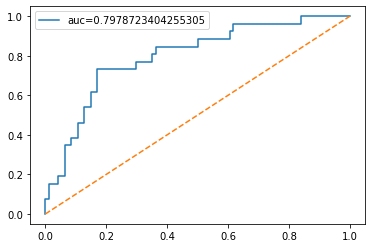

In [214]:
plt.plot(fpr, tpr, label='auc='+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()